In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline




In [9]:
## read the dataset
df=pd.read_csv("heightweight.csv")
df.head()

,Height,Weight
0,66.0,140
1,72.0,145
2,73.5,160
3,73.0,190
4,69.0,155


Text(0, 0.5, 'Height')

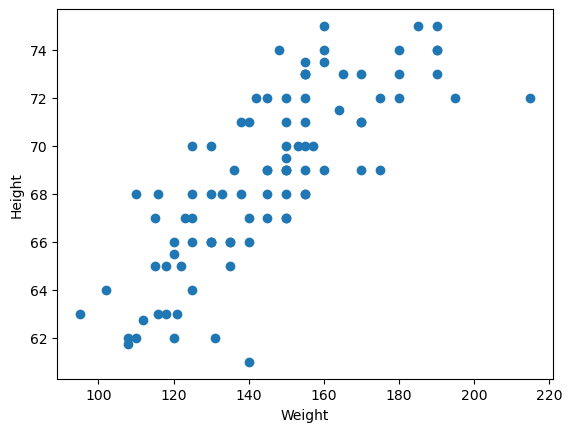

In [97]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


In [96]:
## divide our datset into independet and dependent features
x=df[['Weight']]
y=df['Height']

In [19]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [99]:
x.shape

(92, 1)

In [100]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((73, 1), (19, 1), (73,), (19,))

In [101]:
## standardize the datset train independet data
from sklearn.preprocessing import StandardScaler

In [102]:
scaler=StandardScaler()

In [103]:
scaler.fit_transform(x_train)


array([[-0.3626669 ],
       [ 1.34962606],
       [-0.62609658],
       [-0.97733616],
       [-1.24076585],
       [-1.41638564],
       [ 0.47152711],
       [-0.93343122],
       [-1.06514606],
       [ 0.03247763],
       [-1.15295595],
       [-0.274857  ],
       [-0.62609658],
       [ 0.91057658],
       [ 0.47152711],
       [ 1.5691508 ],
       [ 1.34962606],
       [ 0.47152711],
       [-0.84562132],
       [ 2.00820028],
       [-1.85543511],
       [-0.274857  ],
       [-0.40657184],
       [-0.84562132],
       [-1.06514606],
       [ 0.25200237],
       [ 0.03247763],
       [-0.18704711],
       [ 2.00820028],
       [ 1.13010132],
       [ 0.47152711],
       [ 2.22772501],
       [-1.15295595],
       [ 0.25200237],
       [-0.49438174],
       [ 0.47152711],
       [-2.16276975],
       [ 0.25200237],
       [-1.59200543],
       [ 0.16419248],
       [ 0.47152711],
       [ 0.69105185],
       [-0.40657184],
       [ 0.25200237],
       [-0.09923721],
       [ 0

In [104]:
x_train.head()

,Weight
65,136
15,175
68,130
78,122
30,116


In [106]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [93]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X has feature names.*")


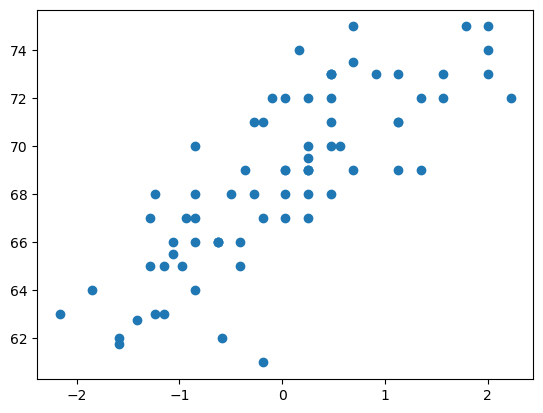

In [107]:
plt.scatter(x_train,y_train)

In [108]:
## train the simple linear regression project
from sklearn.linear_model import LinearRegression

In [110]:
regressor=LinearRegression()

In [111]:
regressor.fit(x_train,y_train)

LinearRegression()

In [114]:
print("the slope or coefficient of weight is",regressor.coef_)
print("intercept:",regressor.intercept_)

the slope or coefficient of weight is [2.86479577]
intercept: 68.67123287671232


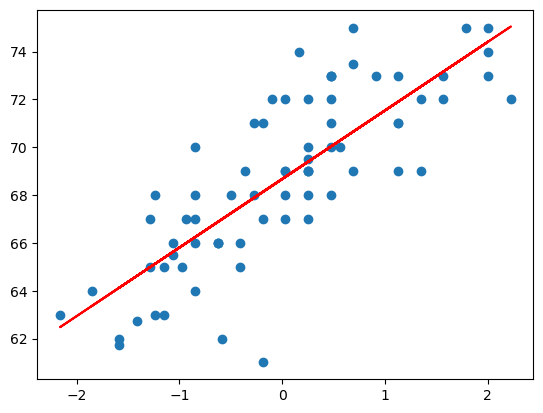

In [118]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

In [119]:
y_pred_test=regressor.predict(x_test)

In [120]:
y_pred_test,y_test

(array([498.3905987 , 441.09468325, 512.71457756, 412.44672553,
        469.74264097, 441.09468325, 684.60232388, 512.71457756,
        527.03855642, 498.3905987 , 383.79876781, 612.98242958,
        383.79876781, 538.4977395 , 506.98498601, 512.71457756,
        584.33447186, 415.3115213 , 455.41866211]),
 40    67.0
 22    70.0
 55    73.5
 72    62.0
 0     66.0
 26    68.0
 39    72.0
 67    68.0
 10    74.0
 44    71.0
 83    68.0
 35    74.0
 89    62.0
 62    71.5
 12    70.0
 4     69.0
 18    74.0
 28    63.0
 49    66.0
 Name: Height, dtype: float64)

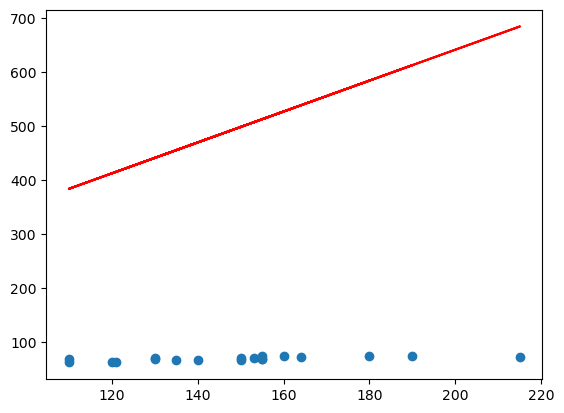

In [123]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'r')

In [ ]:
##performqnce metrics
##mse,mae,rmse
## r suare and adjusted r square

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [126]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

186243.20446818956
425.4248362820019
431.55903937722076


In [130]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [131]:
score

-12853.181591246808

In [132]:
## adjusted r2square
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


-13609.309920143678

In [133]:
regressor


LinearRegression()

In [135]:
## mew data pointweight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight

                               

array([[80.]])

In [136]:
regressor.predict([scaled_weight[0]] )

array([297.85489465])

In [139]:
print("the height prediction for weight 80kg is",regressor.predict([scaled_weight[0]]))

the height prediction for weight 80kg is [297.85489465]


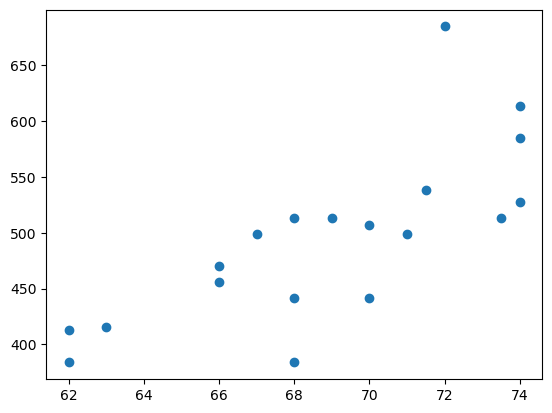

In [140]:
## assumption
## plot a scatter plot for the predictiom
plt.scatter(y_test,y_pred_test)

In [141]:
residuals=y_test-y_pred_test
residuals

40   -431.390599
22   -371.094683
55   -439.214578
72   -350.446726
0    -403.742641
26   -373.094683
39   -612.602324
67   -444.714578
10   -453.038556
44   -427.390599
83   -315.798768
35   -538.982430
89   -321.798768
62   -466.997740
12   -436.984986
4    -443.714578
18   -510.334472
28   -352.311521
49   -389.418662
Name: Height, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17268\3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

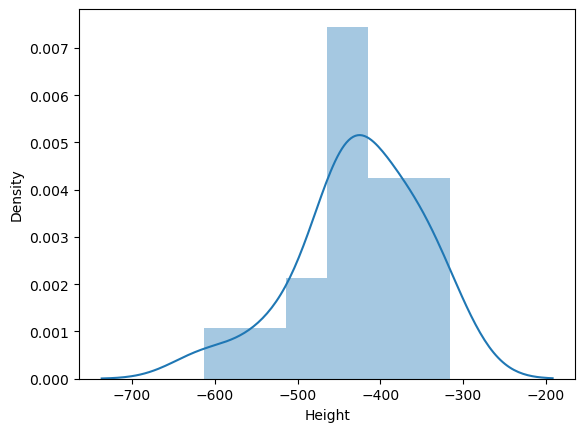

In [142]:
import seaborn as sns
sns.distplot(residuals,kde=True)